In [2]:
import pandas as pd; import numpy as np

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='tcdvm', api_key='p3MYUniUbxud0ZcpRiEn')

# import plotly.figure_factory as ff
# %matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; seaborn.set()
import re

# Get Caseload information

In [3]:
pd.options.display.max_rows = 999

In [4]:
df = pd.read_json('internships.jsonl', lines=True, dtype=False, convert_dates=False)

In [5]:
df.loc[68, 'name'] = "MedVet Medical & Cancer Centers for Pets (Akron)"

In [6]:
df.loc[69, 'name'] = "MedVet Medical & Cancer Centers for Pets (Chicago)"

In [7]:
df.loc[34, 'total_annual_cases'] = "10000-15000"

In [8]:
# Get rid of commas in total_annual_cases and ">" (e.g. > 20,000)
df['total_annual_cases'] = df['total_annual_cases'].str.replace(',', '')
df['total_annual_cases'] = df['total_annual_cases'].str.replace('>', '')
df['avg_daily_cases'] = df['avg_daily_cases'].str.replace('+', '')
df['avg_daily_ER_cases'] = df['avg_daily_ER_cases'].str.replace('+', '')

In [9]:
# Define function to convert range (e.g. 10000-15000) to one value the average of the two values
def range_to_mean(range_str):
    range_str = range_str.replace(" ", "")
    match = re.search('(\d+)-(\d+)', range_str)
    if match:
        lower = match.group(1)
        upper = match.group(2)
        average = (float(lower)+float(upper))/2
        print(range_str)
        return average
    else:
        return float(range_str)

In [10]:
total_annual_cases_adj = df['total_annual_cases'].apply(range_to_mean)

10000-15000
36000-40000


In [11]:
df.insert(2, 'total_annual_cases_adj', total_annual_cases_adj)

In [12]:
# Adjust average daily cases
avg_daily_cases_adj = df['avg_daily_cases'].apply(range_to_mean)
df.insert(4, 'avg_daily_cases_adj', avg_daily_cases_adj)

8-12
30-40
30-50
60-90
120-160
20-50
40-42
30-45
40-65
80-100
20-25
15-25
80-100
30-35
125-150
90-100
40-50
45-60
95-110
30-35
90-110
15-30
80-120
40-50


In [13]:
# Adjust average daily outpatient cases
avg_daily_outpatient_cases_adj = df['avg_daily_outpatient_cases'].apply(range_to_mean)
df.insert(6, 'avg_daily_outpatient_cases_adj', avg_daily_outpatient_cases_adj)

10-12
25-35
20-40
50-70
85-115
20-30
20-30
20-40
40-50
15-20
10-30
10-15
60-80
25-30
75-80
25-30
20-30
30-35
80-90
20-35
40-50
10-20
40-60
25-35


In [14]:
# Adjust average daily inpatient cases
avg_daily_inpatient_cases_adj = df['avg_daily_inpatient_cases'].apply(range_to_mean)
df.insert(8, 'avg_daily_inpatient_cases_adj', avg_daily_inpatient_cases_adj)

10-12
15-30
15-20
25-65
7-20
8-15
10-30
50-60
10-15
5-15
10-15
20-40
5-8
55-60
10-20
8-15
15-20
12-15
8-12
10-15
10-30
30-45
7-15
20-40
15-25


In [15]:
# Adjust average daily surgeries
avg_daily_surgeries_adj = df['avg_daily_surgeries'].apply(range_to_mean)
df.insert(10, 'avg_daily_surgeries_adj', avg_daily_surgeries_adj)

6-10
4-9
7-9
2-6
5-12
3-9
10-15
6-8
8-15
4-9
15-20
1-3
3-5
3-5
3-5
3-4
3-5
5-8
10-20
2-5
15-20
6-8
10-16
3-5
5-10
3-4
3-4
4-8/
4-7
8-10
2-4
5-6
3-4
8-12
2-5
3-6
20-30
6-10


In [16]:
# Adjust average daily ER cases
avg_daily_ER_cases_adj = df['avg_daily_ER_cases'].apply(range_to_mean)
df.insert(12, 'avg_daily_ER_cases_adj', avg_daily_ER_cases_adj)

15-20
5-15
10-15
20-25
15-30
10-25
30-40
30-34
10-20
15-30
4-6
15-20
20-30
15-30
25-40
30-40
25-35
15-20
9-20
15-20
20-25
25-35
20-25
30-40
7-20
15-25


In [17]:
# Reorder the columns
caseload_df = df[['name', 'total_annual_cases_adj', 'avg_daily_cases_adj', 'avg_daily_outpatient_cases_adj', 'avg_daily_inpatient_cases_adj','avg_daily_surgeries_adj', 'avg_daily_ER_cases_adj']]
caseload_df.sort_values(by='total_annual_cases_adj')

,name,total_annual_cases_adj,avg_daily_cases_adj,avg_daily_outpatient_cases_adj,avg_daily_inpatient_cases_adj,avg_daily_surgeries_adj,avg_daily_ER_cases_adj
0,Arbutus West Animal Clinic,1500.0,10.00,11.0,1.0,1.0,0.1
52,Emergency Pet Clinic,3000.0,10.00,4.0,4.0,1.0,10.0
39,Columbia Pike Animal Hospital,3000.0,12.00,10.0,10.0,2.0,11.0
15,Artemis Veterinary Emergency and Specialty Ser...,3400.0,10.00,6.0,5.0,2.0,10.0
89,Royal Vista Veterinary Specialists,3500.0,35.00,10.0,10.0,10.0,15.0
11,"Atlantic Veterinary College, University of Pri...",4752.0,20.00,15.0,9.0,6.0,5.0
40,Colorado State University Veterinary Teaching ...,4839.0,13.00,9.0,4.0,6.0,14.0
57,IronHorse VetCare Emergency & Specialty Care C...,5500.0,15.00,10.0,4.0,2.0,10.0
136,Veterinary Specialty Centre of Newfoundland an...,6000.0,22.50,15.0,11.0,4.5,13.5
74,MSPCA Angell West,7651.0,25.00,21.0,4.0,3.0,11.0


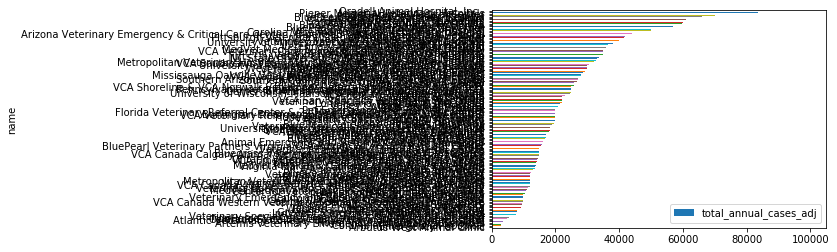

In [18]:
caseload_df.sort_values(by='total_annual_cases_adj').plot(kind="barh", x="name", y="total_annual_cases_adj")

# Number of positions and Practice Type

In [19]:
def practice_type(practice):
    m = re.search('university|college', practice, re.IGNORECASE)
    if m:
        return "Academia"
    else:
        return "PrivatePractice"

In [20]:
cat_df = df[['name', 'number_of_positions']].copy()
cat_df.loc[:, 'number_of_positions'] = cat_df.number_of_positions.astype(int)
cat_df.dtypes

name                   object
number_of_positions     int64
dtype: object

In [21]:
cat_df['practice_type'] = cat_df['name'].apply(practice_type)

In [22]:
cat_df

,name,number_of_positions,practice_type
0,Arbutus West Animal Clinic,1,PrivatePractice
1,Animal Medical Hospital,5,PrivatePractice
2,The Animal Medical Center,25,PrivatePractice
3,Animal Emergency and Referral Center of Minnesota,4,PrivatePractice
4,Angell Animal Medical Center,19,PrivatePractice
5,Affiliated Veterinary Specialists,3,PrivatePractice
6,Advanced Veterinary Specialists,4,PrivatePractice
7,BluePearl Veterinary Partners DC Metro,2,PrivatePractice
8,Bluegrass Veterinary Specialists + Animal Emer...,4,PrivatePractice
9,Avets,2,PrivatePractice


In [23]:
cat_df.number_of_positions.sum()

955

In [24]:
number_position_by_type = cat_df.groupby('practice_type').describe(); number_position_by_type

number_of_positions                                          \
                              count      mean       std  min  25%  50%  75%   
practice_type                                                                 
Academia                       29.0  6.965517  2.679056  1.0  6.0  7.0  8.0   
PrivatePractice               126.0  5.976190  4.142394  1.0  4.0  5.0  7.0   

                       
                  max  
practice_type          
Academia         15.0  
PrivatePractice  25.0

In [25]:
(number_position_by_type['number_of_positions']['count']/155)*100

practice_type
Academia           18.709677
PrivatePractice    81.290323
Name: count, dtype: float64

In [26]:
cat_df.groupby('practice_type').sum()

,number_of_positions
practice_type,
Academia,202
PrivatePractice,753


In [27]:
academia = cat_df[cat_df['practice_type'] == "Academia"].number_of_positions
privatepractice = cat_df[cat_df['practice_type'] == "PrivatePractice"].number_of_positions

(<matplotlib.axes._subplots.AxesSubplot at 0x112572cc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x112572cc0>)

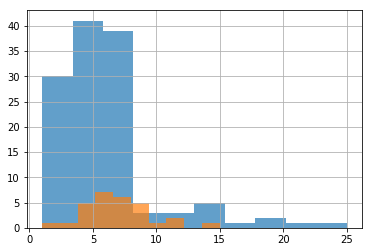

In [50]:
privatepractice.hist(alpha=0.7), academia.hist(alpha=0.7)

In [46]:
privatepractice.describe()

count    126.000000
mean       5.976190
std        4.142394
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       25.000000
Name: number_of_positions, dtype: float64

In [36]:
from scipy import stats
# import statsmodels as sm
# from statsmodels.graphics.gofplots import qqplot_2samples
# from statsmodels.graphics.gofplots import ProbPlot

In [65]:
stats.shapiro(privatepractice)

(0.7968128323554993, 6.389605424622635e-12)

In [54]:
stats.ttest_ind(academia, privatepractice)

Ttest_indResult(statistic=1.2267320049640593, pvalue=0.22180776955050963)